In [ ]:
# We open our csv file and convert all column titles to lowercase

import pandas as pd
import numpy as np

df = pd.read_csv("churndata.csv", index_col=0)
df.columns = map(str.lower, df.columns)

In [ ]:
df.head()

,subscription,upgrade,age,gender,location,digitalfluency,os,nps,churn,supporttickets,...,manual_scan,help,secure_browser,clean_now,parental_control,privacy_settings,scan_now,diagnostic_tool,vpn_toggle,tenure
timestamp,,,,,,,,,,,,,,,,,,,,,
14/08/2019,basic,yes,42,f,Spain,Basic,Mac,8,1,11,...,6007,2320,9730,21620,91,1660,22981,10750,576,3
12/03/2015,premium,no,44,m,Germany,Intermediate,Mac,8,1,0,...,7287,7388,17071,186,17042,23309,1065,15670,10228,7
12/10/2012,basic,no,58,m,Germany,Basic,Mac,8,0,0,...,160,14265,14804,119,11077,5252,22601,24975,731,10
10/06/2021,premium,no,52,m,France,Basic,Mac,1,1,2,...,7996,1959,899,18064,16868,3575,9640,57,2119,1
20/06/2018,basic,no,27,f,Spain,Basic,Linux,6,0,0,...,16085,1346,6527,21106,20317,6274,9201,3385,10397,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 14/08/2019 to 22/03/2013
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   subscription            1000 non-null   object
 1   upgrade                 1000 non-null   object
 2   age                     1000 non-null   int64 
 3   gender                  1000 non-null   object
 4   location                1000 non-null   object
 5   digitalfluency          1000 non-null   object
 6   os                      1000 non-null   object
 7   nps                     1000 non-null   int64 
 8   churn                   1000 non-null   int64 
 9   supporttickets          1000 non-null   int64 
 10  competitormention       1000 non-null   int64 
 11  notification_settings   1000 non-null   int64 
 12  notification_dismissal  1000 non-null   int64 
 13  uninstall               1000 non-null   int64 
 14  delete_falsepop         1000 non-null   int64 

In [ ]:
# Descriptive statistics of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,43.883,12.605007,22.0,32.00,45.0,55.00,65.0
nps,1000.0,5.006,3.136846,0.0,2.00,5.0,8.00,10.0
churn,1000.0,0.744,0.436640,0.0,0.00,1.0,1.00,1.0
supporttickets,1000.0,6.404,7.196984,0.0,0.00,3.0,11.00,25.0
competitormention,1000.0,33.057,29.548043,0.0,6.00,25.0,56.00,100.0
notification_settings,1000.0,3972.765,3552.292681,30.0,751.50,3006.5,6752.25,11926.0
notification_dismissal,1000.0,4425.105,3934.446279,30.0,803.00,3343.5,7549.50,13165.0
uninstall,1000.0,4906.750,4376.934689,30.0,904.25,3655.0,8322.25,14379.0
delete_falsepop,1000.0,5377.946,4748.560965,30.0,948.75,4177.0,9092.75,15588.0
silent_mode,1000.0,5823.427,5032.563946,30.0,1245.25,4445.0,9953.25,16768.0


In [ ]:
import pandas as pd

# Define the parameters we want to compare
parameters = ['gender', 'location', 'os', 'subscription', 'digitalfluency', 'nps']

# Create a dictionary to store the results
result_dict = {}

# Iterate through parameters and calculate churn vs non-churn counts
for param in parameters:
    result_dict[param] = df.groupby([param, 'churn']).size().unstack(fill_value=0)

# Display the results
for param, result in result_dict.items():
    print(f"\n{param.capitalize()} vs Churn:\n{result}")


Gender vs Churn:
churn     0    1
gender          
f       130  360
m       126  384

Location vs Churn:
churn       0    1
location          
France     41  202
Germany    42  175
Spain     173  367

Os vs Churn:
churn      0    1
os               
Linux    183  285
Mac       58  271
Windows   15  188

Subscription vs Churn:
churn           0    1
subscription          
basic         232  317
premium        19  185
trial           5  242

Digitalfluency vs Churn:
churn             0    1
digitalfluency          
Advanced         38  129
Basic            53  151
Intermediate    165  464

Nps vs Churn:
churn   0   1
nps          
0      21  58
1      23  63
2      27  83
3      26  73
4      23  68
5      22  53
6      30  77
7      20  57
8      19  71
9      26  71
10     19  70


In [ ]:
# The frequency of the dependent variable "churn"
df["churn"].value_counts()

1    744
0    256
Name: churn, dtype: int64

In [ ]:
# Let's rename the churn column to churn vs no_churn
churn = df[df["churn"] == 1]
non_churn = df[df["churn"] == 0]

In [ ]:
# Just a quick view of the dataset with the segment of the people who churned
churn.head()

,subscription,upgrade,age,gender,location,digitalfluency,os,nps,churn,supporttickets,...,manual_scan,help,secure_browser,clean_now,parental_control,privacy_settings,scan_now,diagnostic_tool,vpn_toggle,tenure
timestamp,,,,,,,,,,,,,,,,,,,,,
14/08/2019,basic,yes,42,f,Spain,Basic,Mac,8,1,11,...,6007,2320,9730,21620,91,1660,22981,10750,576,3
12/03/2015,premium,no,44,m,Germany,Intermediate,Mac,8,1,0,...,7287,7388,17071,186,17042,23309,1065,15670,10228,7
10/06/2021,premium,no,52,m,France,Basic,Mac,1,1,2,...,7996,1959,899,18064,16868,3575,9640,57,2119,1
17/04/2013,basic,no,39,m,Spain,Basic,Linux,8,1,14,...,374,4574,843,2029,2292,5173,2687,6854,5684,9
25/10/2014,basic,no,26,f,Germany,Intermediate,Mac,5,1,19,...,3432,16280,13001,628,10677,19418,12077,22024,8922,8


In [ ]:
# We grouped by the location variable and looked at how many years on average each geographic segment were clients before they exited.
df.groupby(["location", "churn"]).agg({"tenure" : "mean"})

tenure
location churn          
France   0      5.317073
         1      5.732673
Germany  0      5.619048
         1      6.320000
Spain    0      5.913295
         1      5.850136

In [ ]:

# We grouped by the 'subscription' variable and examined the average number of years each subscription segment remained as clients before they churned.

df.groupby(["subscription", "churn"]).agg({"tenure" : "mean"})

tenure
subscription churn          
basic        0      5.676724
             1      5.817035
premium      0      7.000000
             1      6.178378
trial        0      5.400000
             1      5.884298

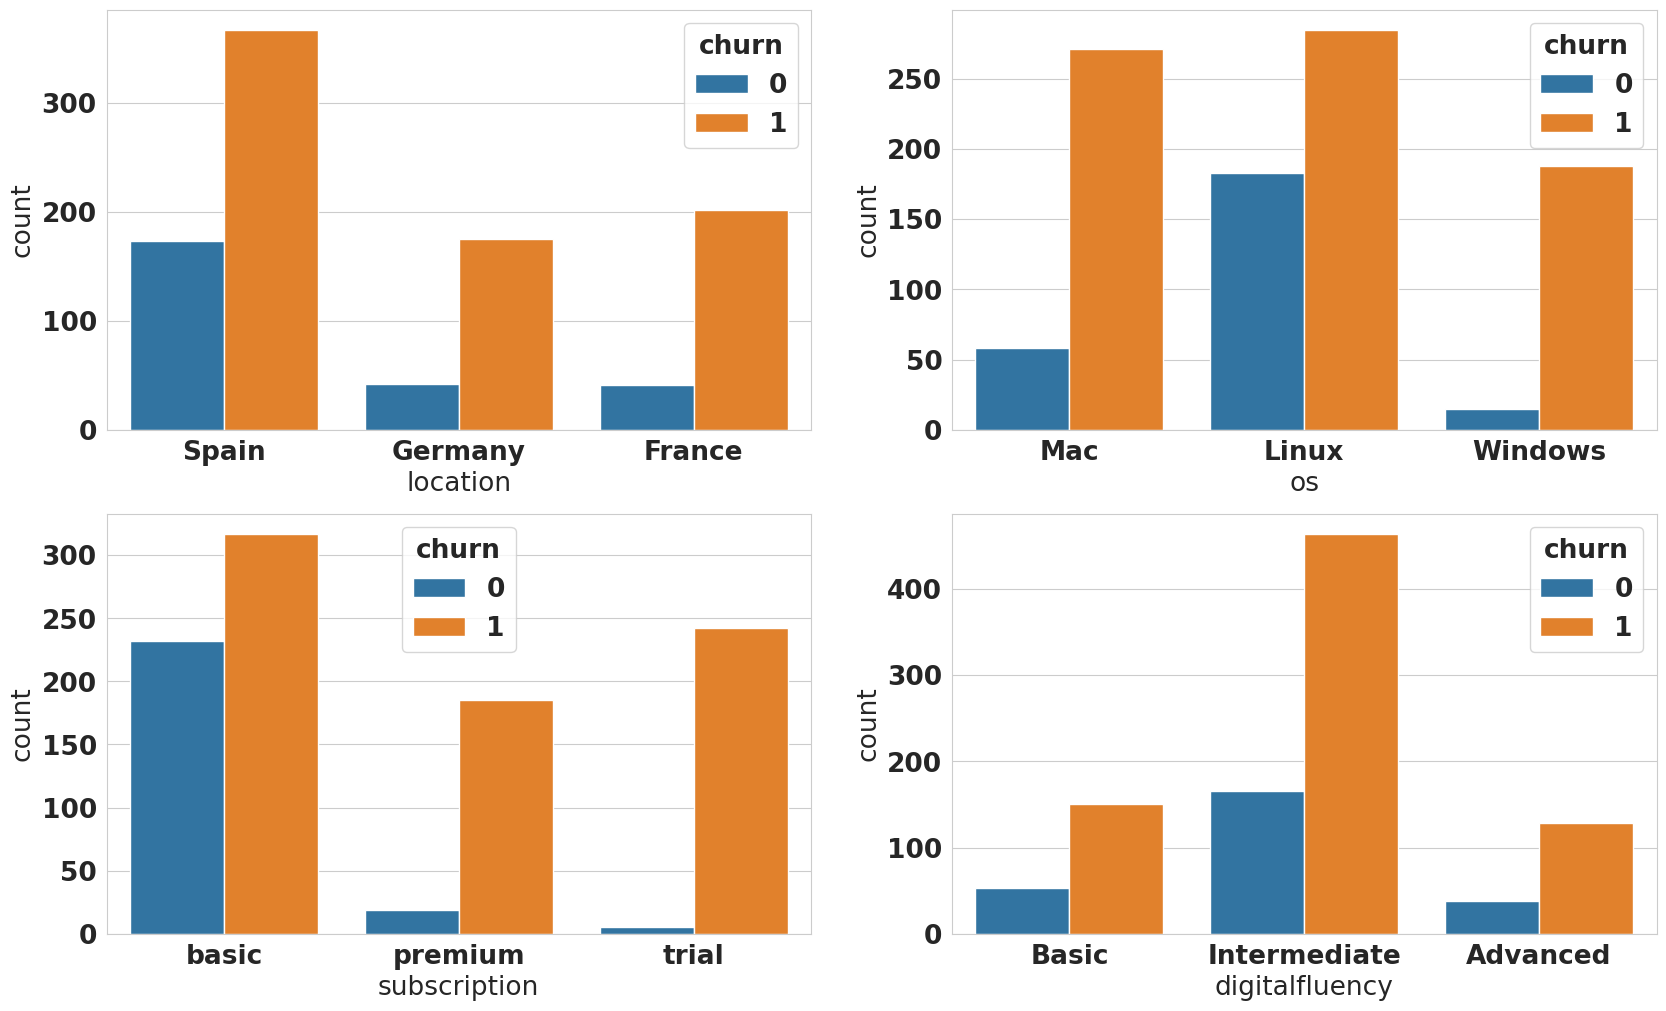

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='location', hue='churn', data=df, ax=axarr[0][0])
sns.countplot(x='os', hue='churn', data=df, ax=axarr[0][1])
sns.countplot(x='subscription', hue='churn', data=df, ax=axarr[1][0])
sns.countplot(x='digitalfluency', hue='churn', data=df, ax=axarr[1][1])
plt.show()


In [ ]:
# The dependent variable was plotted according to age and location variables.
import plotly.express as px
fig = px.bar(df,y = "churn", x = "nps" , color = "location")
fig.show()

In [ ]:
#FEATURE ENGINEERING

In [ ]:
#Generate a categorical variable that categorizes customers based on age brackets, such as 20-30, 30-40, and so forth
df['AgeGroup'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

In [ ]:
import pandas as pd

# Create a variable based on the combination of the number of support tickets raised and the NPS score given.
df['SupportSeverity'] = df['supporttickets'] * df['nps']

bins = [-float('inf'), 15, 35, float('inf')]
labels = ['Low Severity', 'Medium Severity', 'High Severity']

# Apply pd.cut to create the new categorical variable 'SupportSeverityLevel'
df['SupportSeverityLevel'] = pd.cut(df['SupportSeverity'], bins=bins, labels=labels, include_lowest=True)

# Print the DataFrame to check the new variable, excluding the SupportSeverity column
print(df[['supporttickets', 'nps', 'SupportSeverityLevel']])


            supporttickets  nps SupportSeverityLevel
timestamp                                           
14/08/2019              11    8        High Severity
12/03/2015               0    8         Low Severity
12/10/2012               0    8         Low Severity
10/06/2021               2    1         Low Severity
20/06/2018               0    6         Low Severity
...                    ...  ...                  ...
15/09/2015              12    6        High Severity
14/08/2017              10    6        High Severity
18/02/2020              20    5        High Severity
17/12/2015              18    4        High Severity
22/03/2013               0    7         Low Severity

[1000 rows x 3 columns]


In [ ]:
df.head()

,subscription,upgrade,age,gender,location,digitalfluency,os,nps,churn,supporttickets,...,clean_now,parental_control,privacy_settings,scan_now,diagnostic_tool,vpn_toggle,tenure,AgeGroup,SupportSeverity,SupportSeverityLevel
timestamp,,,,,,,,,,,,,,,,,,,,,
14/08/2019,basic,yes,42,f,Spain,Basic,Mac,8,1,11,...,21620,91,1660,22981,10750,576,3,40-50,88,High Severity
12/03/2015,premium,no,44,m,Germany,Intermediate,Mac,8,1,0,...,186,17042,23309,1065,15670,10228,7,40-50,0,Low Severity
12/10/2012,basic,no,58,m,Germany,Basic,Mac,8,0,0,...,119,11077,5252,22601,24975,731,10,50-60,0,Low Severity
10/06/2021,premium,no,52,m,France,Basic,Mac,1,1,2,...,18064,16868,3575,9640,57,2119,1,50-60,2,Low Severity
20/06/2018,basic,no,27,f,Spain,Basic,Linux,6,0,0,...,21106,20317,6274,9201,3385,10397,4,20-30,0,Low Severity


In [ ]:
#ONE HOT ENCODING

In [ ]:
# Apply one-hot encoding to specified columns
df = pd.get_dummies(df, columns=["gender", "subscription", "os", "SupportSeverityLevel", "upgrade", "digitalfluency", "location", "AgeGroup"], drop_first=False)

df.head()

,age,nps,churn,supporttickets,competitormention,notification_settings,notification_dismissal,uninstall,delete_falsepop,silent_mode,...,digitalfluency_Basic,digitalfluency_Intermediate,location_France,location_Germany,location_Spain,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70
timestamp,,,,,,,,,,,,,,,,,,,,,
14/08/2019,42,8,1,11,40,957,5699,6866,893,1251,...,1,0,0,0,1,0,0,1,0,0
12/03/2015,44,8,1,0,13,10454,5672,2740,10373,6067,...,0,1,0,1,0,0,0,1,0,0
12/10/2012,58,8,0,0,1,878,7392,7934,10594,10054,...,1,0,0,1,0,0,0,0,1,0
10/06/2021,52,1,1,2,70,2914,3394,2204,1283,589,...,1,0,1,0,0,0,0,0,1,0
20/06/2018,27,6,0,0,2,8320,1670,12355,1369,2046,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 14/08/2019 to 22/03/2013
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   1000 non-null   int64
 1   nps                                   1000 non-null   int64
 2   churn                                 1000 non-null   int64
 3   supporttickets                        1000 non-null   int64
 4   competitormention                     1000 non-null   int64
 5   notification_settings                 1000 non-null   int64
 6   notification_dismissal                1000 non-null   int64
 7   uninstall                             1000 non-null   int64
 8   delete_falsepop                       1000 non-null   int64
 9   silent_mode                           1000 non-null   int64
 10  subscription_plan                     1000 non-null   int64
 11  manual_scan                      

In [ ]:
#SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler


#This piece of code is a common preprocessing step for preparing data for a machine learning model. Let's break it down step by step:
# Isolate the target variable 'churn' from the remaining features. The variable y holds data indicating whether customers have churned or not.
y = df["churn"]
# Create a new DataFrame X containing all features except the target variable 'exited'. X contains all other details about customers except the information on whether they churned.
X = df.drop(["churn"], axis = 1)
# Store the column names and index of the feature DataFrame X
cols = X.columns
index = X.index
#This separation is useful because, in machine learning, we typically train a model to predict something (like whether a customer will churn) based on other information we have about them (the features in X).


# Normalize the feature set using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized array back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=cols, index=index)

print(X_normalized_df)


                 age       nps  supporttickets  competitormention  \
timestamp                                                           
14/08/2019 -0.149460  0.954939        0.638920           0.235091   
12/03/2015  0.009287  0.954939       -0.890262          -0.679132   
12/10/2012  1.120512  0.954939       -0.890262          -1.085454   
10/06/2021  0.644273 -1.277718       -0.612229           1.250895   
20/06/2018 -1.340059  0.317037       -0.890262          -1.051594   
...              ...       ...             ...                ...   
15/09/2015  0.247406  0.317037        0.777937          -0.577552   
14/08/2017 -0.466953  0.317037        0.499904          -0.983874   
18/02/2020 -0.943192 -0.001914        1.890070          -1.051594   
17/12/2015  0.247406 -0.320865        1.612037          -0.882293   
22/03/2013  1.041139  0.635988       -0.890262           0.912293   

            notification_settings  notification_dismissal  uninstall  \
timestamp                     

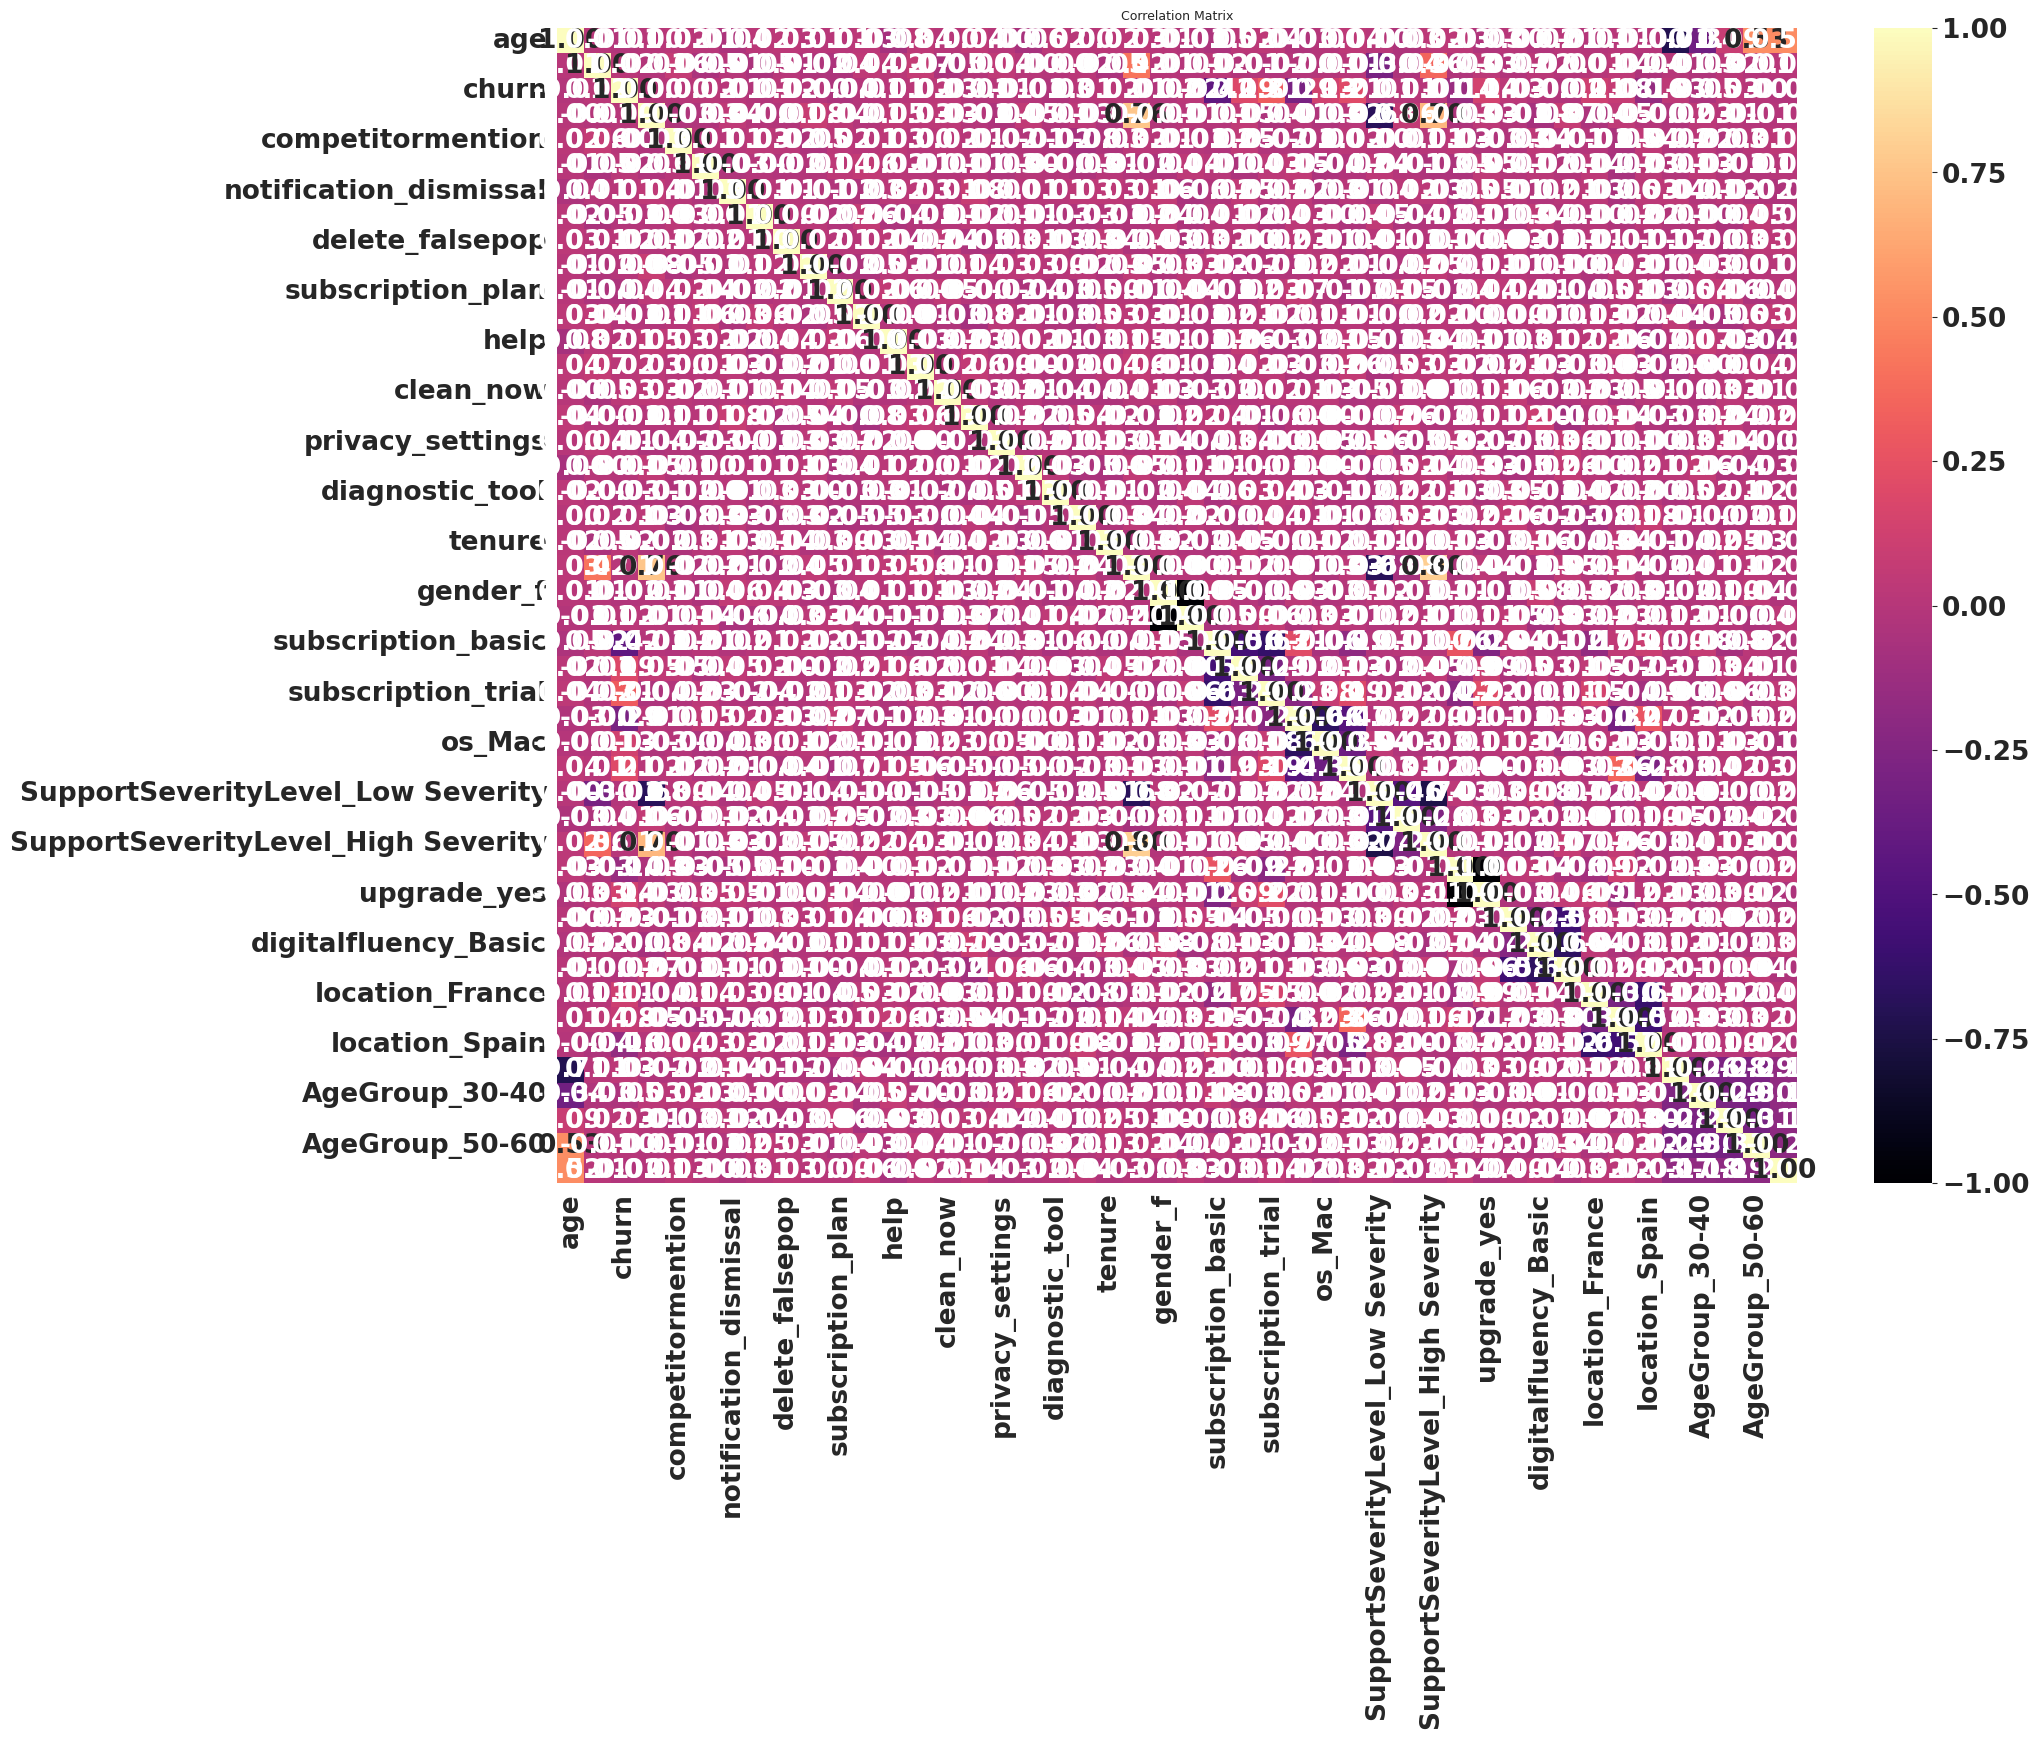

In [ ]:
df.corr()


# Correlation Matrix in a visual form
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=9)
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler

#This piece of code is a common preprocessing step for preparing data for a machine learning model. Let's break it down step by step:
# Separate the target variable 'churn' from the rest of the features. y contains information about whether customers churned or not.
y = df["churn"]
# Create a new DataFrame X containing all features except the target variable 'exited'. X contains all other details about customers except the information on whether they churned.
X = df.drop(["churn"], axis = 1)
# Store the column names and index of the feature DataFrame X
cols = X.columns
index = X.index
#This separation is useful because, in machine learning, we typically train a model to predict something (like whether a customer will churn) based on other information we have about them (the features in X).


df[cols] = X
# Print the first few rows to check the result
print(df.head())


            age  nps  churn  supporttickets  competitormention  \
timestamp                                                        
14/08/2019   42    8      1              11                 40   
12/03/2015   44    8      1               0                 13   
12/10/2012   58    8      0               0                  1   
10/06/2021   52    1      1               2                 70   
20/06/2018   27    6      0               0                  2   

            notification_settings  notification_dismissal  uninstall  \
timestamp                                                              
14/08/2019                    957                    5699       6866   
12/03/2015                  10454                    5672       2740   
12/10/2012                    878                    7392       7934   
10/06/2021                   2914                    3394       2204   
20/06/2018                   8320                    1670      12355   

            delete_falsepop  sil

In [ ]:
print(X.dtypes)

age                                     int64
nps                                     int64
supporttickets                          int64
competitormention                       int64
notification_settings                   int64
notification_dismissal                  int64
uninstall                               int64
delete_falsepop                         int64
silent_mode                             int64
subscription_plan                       int64
manual_scan                             int64
help                                    int64
secure_browser                          int64
clean_now                               int64
parental_control                        int64
privacy_settings                        int64
scan_now                                int64
diagnostic_tool                         int64
vpn_toggle                              int64
tenure                                  int64
SupportSeverity                         int64
gender_f                          

In [ ]:
X.head()

,age,nps,supporttickets,competitormention,notification_settings,notification_dismissal,uninstall,delete_falsepop,silent_mode,subscription_plan,...,digitalfluency_Basic,digitalfluency_Intermediate,location_France,location_Germany,location_Spain,AgeGroup_20-30,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70
timestamp,,,,,,,,,,,,,,,,,,,,,
14/08/2019,42,8,11,40,957,5699,6866,893,1251,815,...,1,0,0,0,1,0,0,1,0,0
12/03/2015,44,8,0,13,10454,5672,2740,10373,6067,2636,...,0,1,0,1,0,0,0,1,0,0
12/10/2012,58,8,0,1,878,7392,7934,10594,10054,5941,...,1,0,0,1,0,0,0,0,1,0
10/06/2021,52,1,2,70,2914,3394,2204,1283,589,6458,...,1,0,1,0,0,0,0,0,1,0
20/06/2018,27,6,0,2,8320,1670,12355,1369,2046,540,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
y.head()

timestamp
14/08/2019    1
12/03/2015    1
12/10/2012    0
10/06/2021    1
20/06/2018    0
Name: churn, dtype: int64

In [ ]:
#TRAIN-TEST SEPARATION AND BALANCING

In [ ]:
from sklearn.model_selection import train_test_split

# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17694)

In [ ]:
# If our dataset is imbalanced, we can consider using techniques like SMOTETomek to improve model performance although it's not mandatory.
from imblearn.combine import SMOTETomek

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

smk = SMOTE ()
# Oversample training  data
X_train, y_train = oversample.fit_resample(X_train, y_train)

# Oversample validation data
X_test, y_test = oversample.fit_resample(X_test, y_test)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1198, 45) (290, 45) (1198,) (290,)


In [ ]:
#MODELING

In [ ]:
#By installing CatBoost, we gain access to its powerful features and capabilities, which can be beneficial for various machine learning tasks, particularly those involving structured/tabular data.

!pip3 install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
#Create list to store our models

models = []
models.append(('LR', LogisticRegression(random_state = 17694)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 17694)))
models.append(('RF', RandomForestClassifier(random_state = 17694)))
models.append(('SVM', SVC(gamma='auto', random_state = 17694)))
models.append(('XGB', GradientBoostingClassifier(random_state = 17694)))
models.append(("LightGBM", LGBMClassifier(random_state = 17694)))
models.append(("CatBoost", CatBoostClassifier(random_state = 17694, verbose = False)))

# evaluate each model
results = []
names = []

In [ ]:
#ACCURACY SCORE

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming X_train and X_test are our training and testing feature sets
# Checking for and drop duplicated columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

# Now, continuing with our model training loop
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR: (0.526846)
KNN: (0.687919)
CART: (0.815436)
RF: (0.872483)
SVM: (0.473154)
XGB: (0.862416)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 603, number of negative: 587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4167
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506723 -> initscore=0.026892
[LightGBM] [Info] Start training from score 0.026892
LightGBM: (0.859060)
CatBoost: (0.879195)


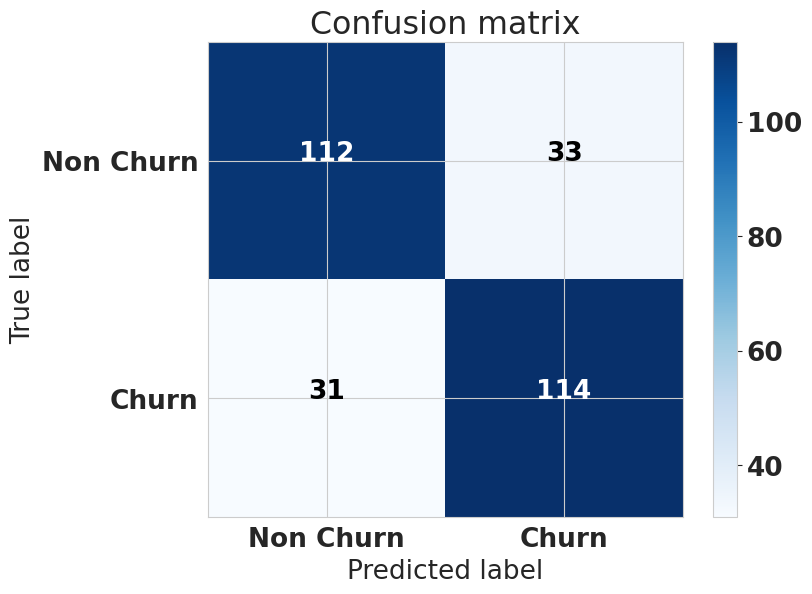

    y_test  y_pred prediction_result
23       0       1                FP
27       0       1                FP
33       0       1                FP
36       0       1                FP
45       0       1                FP
    y_test  y_pred prediction_result
3        1       0                FN
11       1       0                FN
15       1       0                FN
22       1       0                FN
31       1       0                FN


In [ ]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Calculate confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Non Churn', 'Churn'], title='Confusion matrix')

# Show plot
plt.show()

# Calculate True Positives, True Negatives, False Positives, and False Negatives
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Create DataFrame for prediction results
df_pred = pd.DataFrame(data=[], columns=["y_test", "y_pred"])
df_pred["y_test"] = y_test
df_pred["y_pred"] = y_pred

# Categorize predictions
df_pred['prediction_result'] = 'TN'
df_pred.loc[(df_pred['y_test'] == 1) & (df_pred['y_pred'] == 1), 'prediction_result'] = 'TP'
df_pred.loc[(df_pred['y_test'] == 0) & (df_pred['y_pred'] == 1), 'prediction_result'] = 'FP'
df_pred.loc[(df_pred['y_test'] == 1) & (df_pred['y_pred'] == 0), 'prediction_result'] = 'FN'

# Display False Positive and False Negative predictions
print(df_pred[df_pred['prediction_result'] == 'FP'].head())
print(df_pred[df_pred['prediction_result'] == 'FN'].head())


In [ ]:
#ROC CURVE
#The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across various threshold values.
#It provides insight into how well the model distinguishes between the positive and negative classes at different classification thresholds.
#The higher the Area Under the ROC Curve (ROC AUC),, the better the model's overall performance.

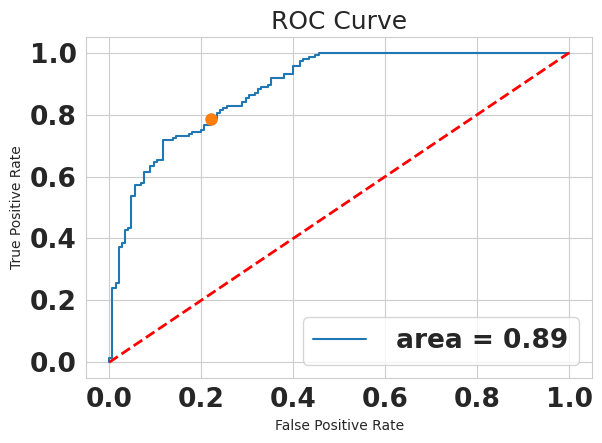

In [ ]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [ ]:
#an AUC of 0.89 suggests that the model performs well above random chance.
#It correctly identifies true positives at a higher rate while keeping false positives relatively low.
#This indicates that the model has a strong ability to discriminate between the positive and negative classes, making it useful for classification tasks.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR does not support feature importance analysis.
KNN does not support feature importance analysis.


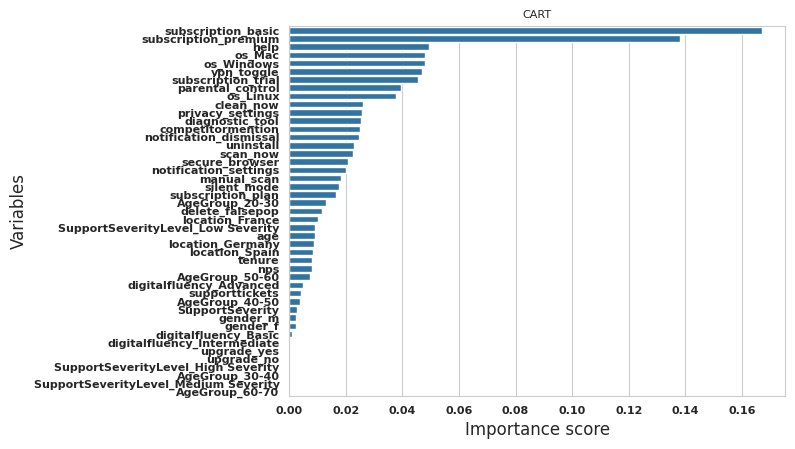

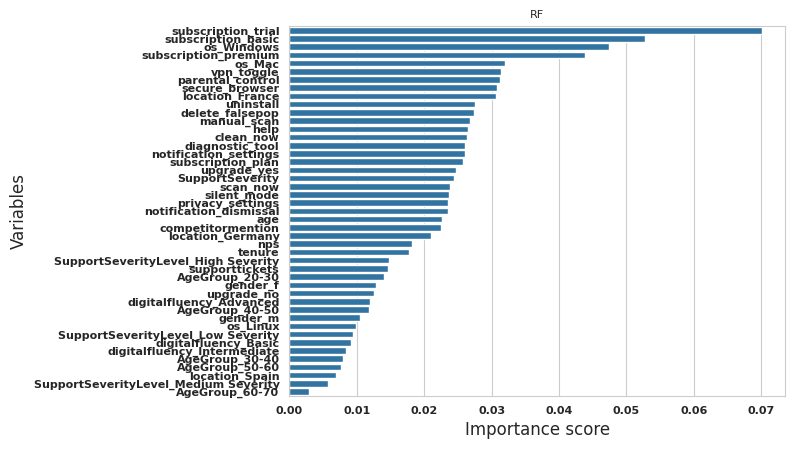

SVM does not support feature importance analysis.


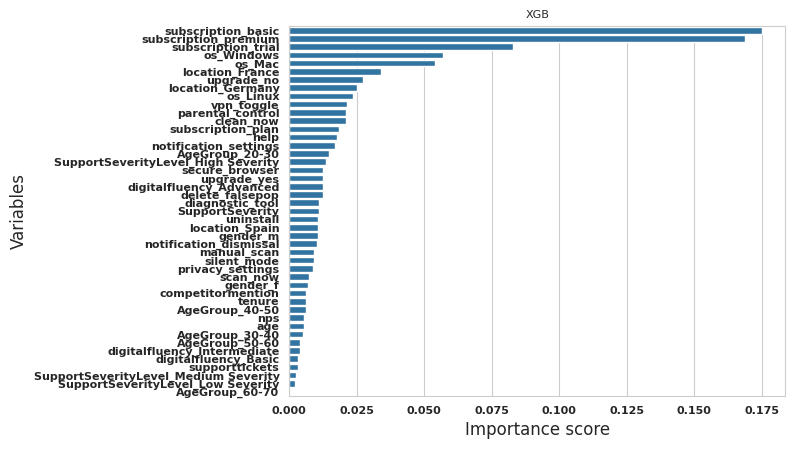

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 603, number of negative: 587
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4167
[LightGBM] [Info] Number of data points in the train set: 1190, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506723 -> initscore=0.026892
[LightGBM] [Info] Start training from score 0.026892


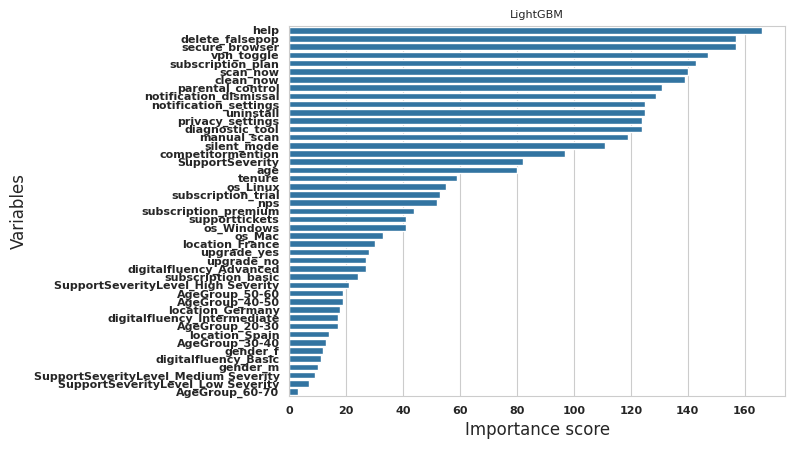

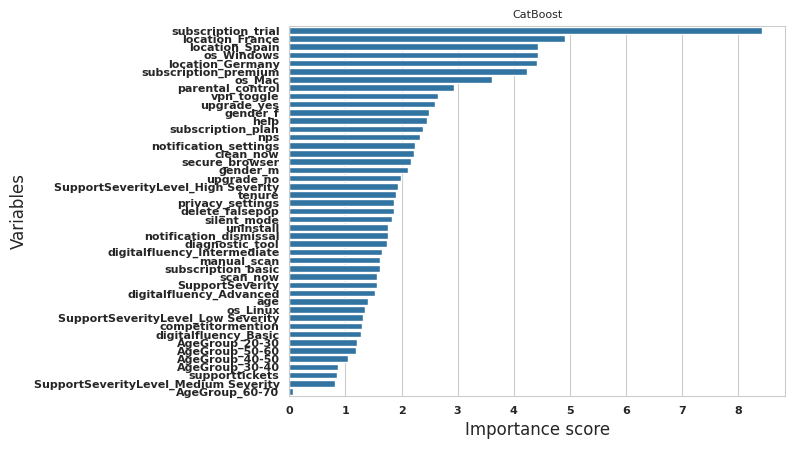

In [ ]:
for name, model in models:
    base = model.fit(X_train, y_train)
    y_pred = base.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    # Check if the model has feature importances (only applicable for tree-based models)
    if hasattr(base, 'feature_importances_'):
        # Check if the number of features in X_train and feature importances match
        if len(X_train.columns) != len(base.feature_importances_):
            print(f"Number of features in X_train ({len(X_train.columns)}) does not match "
                  f"number of feature importances ({len(base.feature_importances_)}).")
            continue

        feature_imp = pd.Series(base.feature_importances_,
                                index=X_train.columns).sort_values(ascending=False)

        # Plot the feature importances
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Importance score', fontsize=12)  # Adjust text size here
        plt.ylabel('Variables', fontsize=12)  # Adjust text size here
        plt.title(name, fontsize=8)  # Adjust title text size here
        plt.tick_params(axis='both', which='major', labelsize=8)  # Adjust tick label size
        plt.show()
    else:
        print(f"{name} does not support feature importance analysis.")


In [ ]:
#DECISION TREE CLASSIFIER - TEST
#While both methods provide insight into feature importance, the RF method might be more intuitive for comparing the relative importance of different features, especially when dealing with larger datasets or ensembles of trees.
#Additionally, visualizing the decision tree itself (as done in the DT code) can be helpful for understanding the logic behind individual predictions made by the model.

Accuracy on test set: 0.81


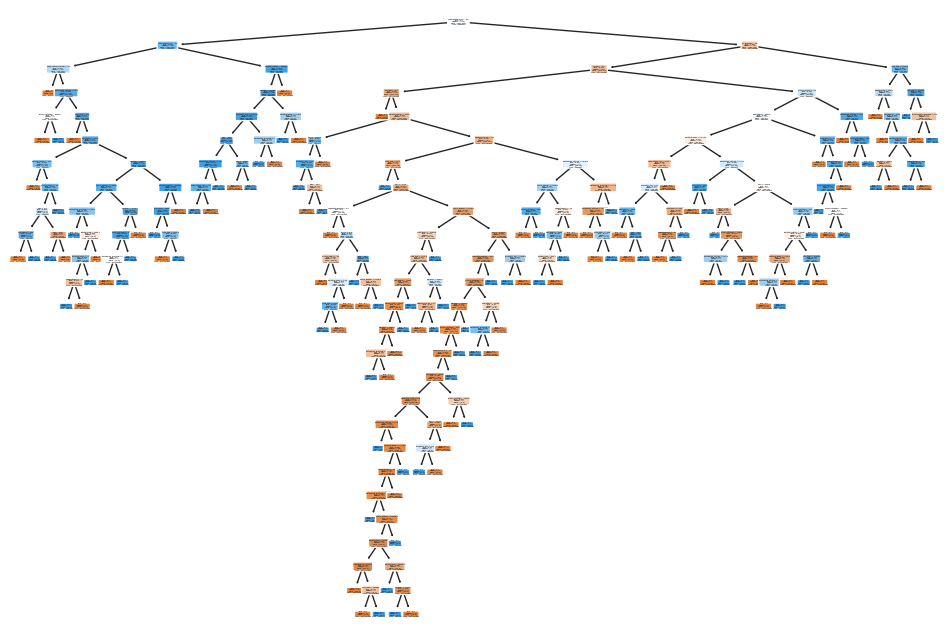

age: 0.0123
nps: 0.0042
supporttickets: 0.0183
competitormention: 0.0168
notification_settings: 0.0278
notification_dismissal: 0.0276
uninstall: 0.0220
delete_falsepop: 0.0210
silent_mode: 0.0189
subscription_plan: 0.0147
manual_scan: 0.0220
help: 0.0468
secure_browser: 0.0226
clean_now: 0.0284
parental_control: 0.0343
privacy_settings: 0.0374
scan_now: 0.0157
diagnostic_tool: 0.0218
vpn_toggle: 0.0456
tenure: 0.0081
SupportSeverity: 0.0059
gender_f: 0.0000
gender_m: 0.0000
subscription_basic: 0.1670
subscription_premium: 0.1380
subscription_trial: 0.0455
os_Linux: 0.0356
os_Mac: 0.0480
os_Windows: 0.0479
SupportSeverityLevel_Low Severity: 0.0000
SupportSeverityLevel_Medium Severity: 0.0000
SupportSeverityLevel_High Severity: 0.0000
upgrade_no: 0.0000
upgrade_yes: 0.0000
digitalfluency_Advanced: 0.0022
digitalfluency_Basic: 0.0000
digitalfluency_Intermediate: 0.0000
location_France: 0.0102
location_Germany: 0.0043
location_Spain: 0.0075
AgeGroup_20-30: 0.0130
AgeGroup_30-40: 0.0000
Age

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and fit a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Calculate accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")


# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Not churned", "Churned"], filled=True, rounded=True)
plt.show()


# Extract and print the feature importance
feature_importance = clf.feature_importances_
feature_names = X.columns


for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")


# Extract and print the decision rules
tree_rules = []
tree = clf.tree_


def get_rules(node_id=0, rule=[]):
    if tree.feature[node_id] != -2:  # If not a leaf node
        feature = X.columns[tree.feature[node_id]]
        threshold = tree.threshold[node_id]
        left_rule = rule + [f"{feature} <= {threshold:.2f}"]
        right_rule = rule + [f"{feature} > {threshold:.2f}"]
        get_rules(tree.children_left[node_id], left_rule)
        get_rules(tree.children_right[node_id], right_rule)
    else:
        class_name = "Churned" if tree.value[node_id][0][1] > tree.value[node_id][0][0] else "Not churned"
        tree_rules.append((rule, class_name))


get_rules()
for rule, class_name in tree_rules:
    print(f"If {', '.join(rule)} then {class_name}")

In [ ]:
#FEATURE IMPORTANCE

                                 Feature  Importance
23                    subscription_basic    0.166975
24                  subscription_premium    0.138010
27                                os_Mac    0.047965
28                            os_Windows    0.047890
11                                  help    0.046836
18                            vpn_toggle    0.045629
25                    subscription_trial    0.045492
15                      privacy_settings    0.037354
26                              os_Linux    0.035585
14                      parental_control    0.034328
13                             clean_now    0.028364
4                  notification_settings    0.027834
5                 notification_dismissal    0.027619
12                        secure_browser    0.022578
6                              uninstall    0.022043
10                           manual_scan    0.022004
17                       diagnostic_tool    0.021832
7                        delete_falsepop    0.

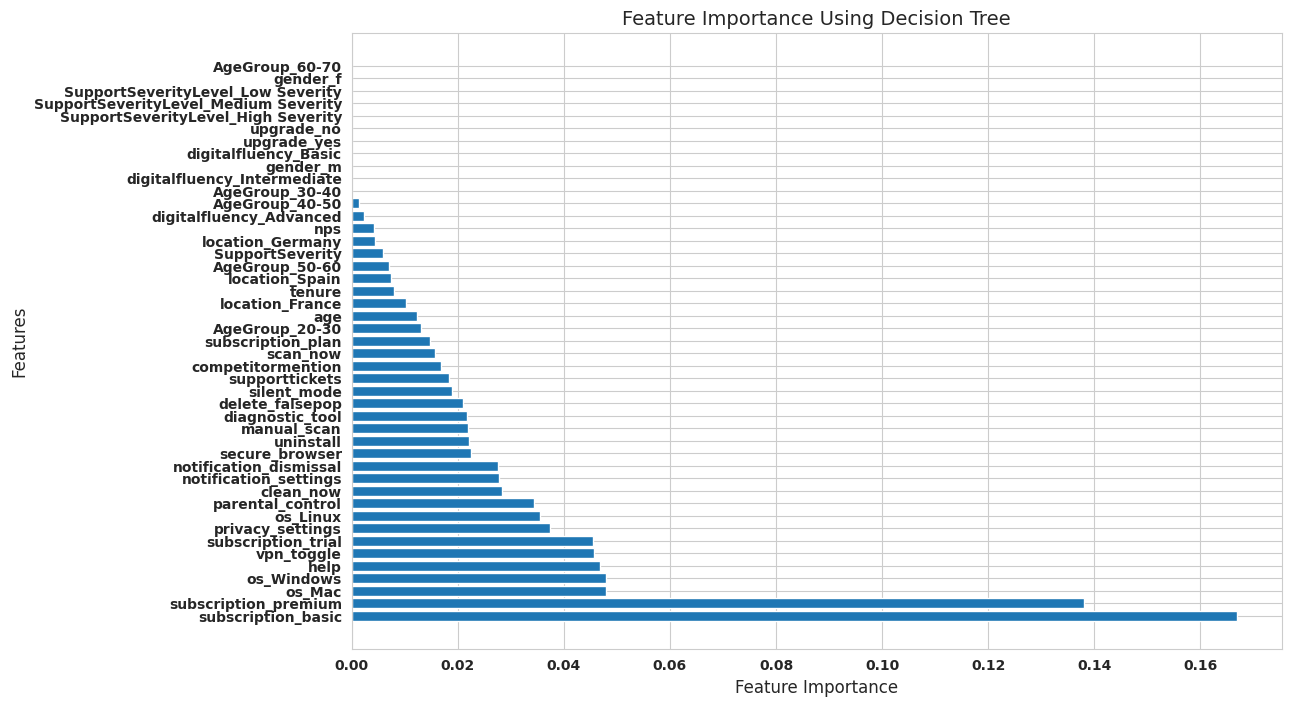

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Extract feature importance
feature_importance = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance with smaller text size
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature Importance", fontsize=12)  # Adjust text size here
plt.ylabel("Features", fontsize=12)  # Adjust text size here
plt.title("Feature Importance Using Decision Tree", fontsize=14)  # Adjust title text size here
plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick label size
plt.show()
